In [14]:
import os

In [28]:
import math
import re
import operator
import gzip
import random
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.special import comb
from collections import defaultdict, Counter, deque
import itertools
#from toolz import partition, sliding_window
import toolz as tz
import matplotlib.pyplot as plt
from Bio import SeqIO
from fasta_parser import parse_fasta, fasta_item_counter, fasta_reader
from system_utils import make_me_a_folder, get_all_fasta, data_generator, get_files2

In [89]:
pd.set_option('max_colwidth', 400)

In [19]:
filename = '/home/paulo/Documents/Projetos/genomas_kmers/Results/Kmers_from_splitted/Acidiphilium/Chromosomes/kmers/Acidiphilium_Chromosomes10.csv.gz'

In [30]:
list_path = get_files2('/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted', 'Chromosomes')

In [31]:
list_path[0]

'/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Thiomonas/Chromosomes/GCF_000092605.1_chr.fna.gz'

In [24]:
def get_fasta_sequence_length(fasta_dict):
    """
    Calculates the sequence length from all fasta files.
    
    Inputs:
        fasta_dict - a dictionary-like object mapping the bacterial genus to
                     the complete pathway to the fasta files.
    
    Outputs:
        fasta_length - a dictionary-like object mapping the bacterial genus to
                       the mean of all genomes lengths.        
    """
    # initialyze the container
    dict_len = defaultdict(int)
    # get the genus names and the files pathways
    for name, filename in data_generator(fasta_dict):
        # add the names to the container
        dict_len[name] = dict_len.get(name, [])
        # uterates throung the fasta files
        for _, seq in parse_fasta(filename):
            # aads the genome length to a list
            dict_len[name] += [len(seq)]
    # get the mean of all genomes from a genus genomes
    return {k: sum(cnt)//len(cnt) for k, cnt in dict_len.items()}          

In [25]:
def get_fasta_sequence_length2(fasta_dict):
    """
    Calculates the sequence length from all fasta files.
    
    Inputs:
        fasta_dict - a dictionary-like object mapping the bacterial genus to
                     the complete pathway to the fasta files.
    
    Outputs:
        fasta_length - a dictionary-like object mapping the bacterial genus to
                       the mean of all genomes lengths.        
    """
    # initialyze the container
    dict_len = defaultdict(int)
    # get the genus names and the files pathways
    for name, filename in data_generator(fasta_dict):
        # add the names to the container
        dict_len[name] = dict_len.get(name, [])
        # uterates throung the fasta files
        for _, seq in fasta_reader(filename):
            # aads the genome length to a list
            dict_len[name] += [len(seq)]
    # get the mean of all genomes from a genus genomes
    return {k: sum(cnt)//len(cnt) for k, cnt in dict_len.items()} 

In [4]:
fasta_dict = get_all_fasta('/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted', 'Chromosomes', 'gz')

In [5]:
fasta_d = {'Acidiphilium': 
            ['/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidiphilium/Chromosomes/GCF_000016725.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidiphilium/Chromosomes/GCF_000202835.1_chr.fna.gz'],
             'Acidipropionibacterium': 
            ['/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidipropionibacterium/Chromosomes/GCF_001441165.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidipropionibacterium/Chromosomes/GCF_005890155.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidipropionibacterium/Chromosomes/GCF_003325455.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidipropionibacterium/Chromosomes/GCF_004011075.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidipropionibacterium/Chromosomes/GCF_900637925.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidipropionibacterium/Chromosomes/GCF_004011055.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidipropionibacterium/Chromosomes/GCF_005890135.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidipropionibacterium/Chromosomes/GCF_001855335.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidipropionibacterium/Chromosomes/GCF_001975205.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidipropionibacterium/Chromosomes/GCF_003956085.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidipropionibacterium/Chromosomes/GCF_000310065.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidipropionibacterium/Chromosomes/GCF_001602115.1_chr.fna.gz'],
             'Acidisarcina': 
            ['/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidisarcina/Chromosomes/GCF_003330725.1_chr.fna.gz'],
             'Acidithiobacillus': 
            ['/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidithiobacillus/Chromosomes/GCF_003966655.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidithiobacillus/Chromosomes/GCF_008694225.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidithiobacillus/Chromosomes/GCF_013462805.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidithiobacillus/Chromosomes/GCF_000021485.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidithiobacillus/Chromosomes/GCF_000214095.2_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidithiobacillus/Chromosomes/GCF_000020825.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidithiobacillus/Chromosomes/GCF_008926505.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidithiobacillus/Chromosomes/GCF_001650235.3_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidithiobacillus/Chromosomes/GCF_900174455.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidithiobacillus/Chromosomes/GCF_000175575.2_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidithiobacillus/Chromosomes/GCF_016250455.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidithiobacillus/Chromosomes/GCF_000221025.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidithiobacillus/Chromosomes/GCF_009662475.1_chr.fna.gz']}

In [26]:
%timeit get_fasta_sequence_length(fasta_d)

838 ms ± 2.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
%timeit get_fasta_sequence_length2(fasta_d)

855 ms ± 6.63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
ecoli = {'Escherichia' : fasta_dict['Escherichia']}

In [34]:
get_fasta_sequence_length(ecoli)

{'Escherichia': 5008866}

In [36]:
s_l = 0
c = 0
for filename in fasta_dict['Escherichia']:
    for _, seq in parse_fasta(filename):
        s_l += len(seq)
        c += 1

In [37]:
print(s_l// c)
print(s_l, c)

5008866
9642068074 1925


In [35]:
get_fasta_sequence_length({'Acidiphilium': ['/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidiphilium/Chromosomes/GCF_000016725.1_chr.fna.gz',
              '/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidiphilium/Chromosomes/GCF_000202835.1_chr.fna.gz']})

{'Acidiphilium': 3569319}

In [9]:
get_fasta_sequence_length({'Acidisarcina': ['/home/paulo/Documents/Projetos/genomas_kmers/Data/Genomes_splitted/Acidisarcina/Chromosomes/GCF_003330725.1_chr.fna.gz']})

{'Acidisarcina': 7112011}

In [15]:
os.path.splitext(filename)

('/home/paulo/Documents/Projetos/genomas_kmers/Results/Kmers_from_splitted/Acidiphilium/Chromosomes/kmers/Acidiphilium_Chromosomes10.csv',
 '.gz')

In [16]:
def get_kmer_count_from_csv(filename):
    """
    Gets the count of all kmers from a csv file.
    
    Inputs:
        filename - a string representing a complete pathway to the csv file.
        
    Outputs:
        kmer_counts - a dictionary-like object mapping the kmers ( a substring of length k)
                      to a integer representing the number of time the kmer was counted
                      in a string.
    """
    # initialyze the dicitonary/container
    kmer_counts = dict()
    # check if the file is compressed
    _, extension = os.path.splitext(filename)
    # if file compressed
    if extension == '.gz':
        opener = gzip.open(filename, 'rt')
    # if not compressed
    else:
        opener = open(filename, 'r')
    # open the compressed csv file
    with opener as file:
        # skip the header
        header = file.readline()
        # iterates through the lines
        for line in file:
            # strip spaces and split the lines in the delimiter
            (key, val) = line.strip('\n').split(",")
            # add the key and the val to the dicitonary
            kmer_counts[key] = val
    return kmer_counts

In [17]:
get_kmer_count_from_csv(filename)

{'AAA': '19091',
 'AAC': '30748',
 'AAG': '30210',
 'AAT': '21558',
 'ACA': '23653',
 'ACC': '57042',
 'ACG': '56690',
 'ACT': '13922',
 'AGA': '29869',
 'AGC': '64661',
 'AGG': '52588',
 'AGT': '13577',
 'ATA': '14129',
 'ATC': '73087',
 'ATG': '50359',
 'ATT': '21637',
 'CAA': '28467',
 'CAC': '48821',
 'CAG': '63952',
 'CAT': '50390',
 'CCA': '54573',
 'CCC': '67250',
 'CCG': '160848',
 'CCT': '55050',
 'CGA': '115380',
 'CGC': '193346',
 'CGG': '156960',
 'CGT': '56931',
 'CTA': '10771',
 'CTC': '58217',
 'CTG': '65121',
 'CTT': '31702',
 'GAA': '48961',
 'GAC': '59759',
 'GAG': '56335',
 'GAT': '72943',
 'GCA': '72320',
 'GCC': '160186',
 'GCG': '189132',
 'GCT': '65727',
 'GGA': '52185',
 'GGC': '156114',
 'GGG': '62944',
 'GGT': '55289',
 'GTA': '11535',
 'GTC': '60068',
 'GTG': '47527',
 'GTT': '30313',
 'TAA': '5090',
 'TAC': '11978',
 'TAG': '10198',
 'TAT': '14320',
 'TCA': '41085',
 'TCC': '53243',
 'TCG': '115947',
 'TCT': '31112',
 'TGA': '40564',
 'TGC': '73244',
 'TGG':

In [36]:
final_kmer_counts(seq_dict, num_seqs, alphabet, min_k, max_k)

('Acidipropionibacterium', 3434825)

In [31]:
sum([3651382,
3622795,
3432872,
3032477,
3180547,
3044937,
2999408,
3631890,
3645455,
3615145,
3656170,
3704826])/12

3434825.3333333335

In [3]:
def sequence_cleaner(sequence, alphabet):
    """
    Clean up a sequence from not allowed characters.
    Input:
        sequence - sequence or a string
    Output:
        sequence - cleaned sequence or a string
    """
    seq = sequence.upper()
    sequence = [base for base in seq if base in alphabet]
    return ''.join(sequence)       

In [4]:
def get_kmers_from_sequence(sequence, kmin, kmax):
    """
    Generate all DNA k-mers over the entirety of a sequence.

    Inputs:

        sequence - string where all kmers will be checked
        kmin: minimum DNA kmer length (int)
        kmax: maximum DNA kmer length (int)

    Output:

        yields all DNA kmers (str) of length kmin to kmax
    """
    # get the kmin and kmax range
    limits = range(kmin, kmax + 1)
    # get the kmer space
    seq_range = len(sequence) - kmax + 1
    # iterates to the range need to get the overlapping kmers
    # and yield all kmer from the input sequence
    for i in range(0, seq_range):
        for j in limits:
            yield sequence[i:i + j]

In [5]:
def get_all_possible_kmers(alphabet, kmin, kmax):
    """Returns a list of all possible combinations of k-mers of
    length k from a input alphabet.

    Inputs:

        alphabet - a alphabet (strings characters) that compound the string sequence
        kmin - minimum DNA kmer length (int)
        kmax - maximum DNA kmer length (int)

    Outputs:

        kmers - list of all possible combinations of k-mers of length k with length
                between kmin and kmax.

    """
    kmers = [''.join(letters) for n in range(kmin, kmax + 1)
             for letters in itertools.product(alphabet, repeat=n)]
    return kmers

In [6]:
kmer_lst = get_all_possible_kmers('ACGT', 6, 6)

In [7]:
for n, seq in parse_fasta('Data/test/H.influenzae.fa.gz'):
    seqv = sequence_cleaner(seq, 'ACGT')

In [7]:
len(seqv), seqv[:40]

(1830025, 'TATGGCAATTAAAATTGGTATCAATGGTTTTGGTCGTATC')

In [8]:
kmer_counts = Counter(get_kmers_from_sequence(seqv, 2, 6))

In [9]:
kmer_counts['GTTAAC']

19

In [10]:
for n, seqe in parse_fasta('Data/test/GCF_000005845.2_chr.fna.gz'):
    seqec = sequence_cleaner(seqe, 'ACGT')

In [11]:
len(seqec), seqec[:40]

(4641652, 'AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTG')

In [12]:
kmer_counts_ec = Counter(get_kmers_from_sequence(seqec, 2, 6))

In [13]:
kmer_counts_ec['GTTAAC']

1597

In [14]:
def base_stats(sequence, alphabet, as_count=False, as_dict=False):
    """Calculates de frequency or the number of bases in a sequence.
    
    Inputs:
    
        sequence - string representing the sequence
        alphabet - a alphabet (strings characters) that compound the string sequence
        as_count - boolean set as False
        as_dict - boolean set as False
    
    Output:
    
        counts - as default returns a numpy array as frequencies (floats) or
                 as a dictionary-like object
    
    Examples:
    
    > baseFreqs(seq, 'ACGT', asCounts = False, asDict = False)
    array([0.25, 0.25, 0.25, 0.25])

    as_count - True, returns a numpy array of counts (integer)
    > baseFreqs('ACGTACGT', 'ACGT', asCounts = True, asDict = False)
    array([2, 2, 2, 2])

    as_dict - True and as_count as default (False) returns a dictionary as bases frequencies (float)
    > baseFreqs('ACGTACGT', 'ACGT', asCounts = False, asDict = True)
    {'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25}

    as_count True and as_dict True, returns a dictionary as base counts (integer)
    > baseFreqs('ACGTACGT', 'ACGT', asCounts = True, asDict = True)
    {'A': 2, 'C': 2, 'G': 2, 'T': 2}
    """
    # make the sequence upper case
    seq = sequence.upper()
    # count all bases in sequence and collect as an array
    counts = np.array([seq.count(i) for i in alphabet])
    # if is onle the counts
    if as_count:
        freqs = counts
    # other wise as frequencies
    else:
        freqs = counts / sum(counts * 1.0)
    # or as a dictionary like object
    if as_dict:
        return dict(zip(alphabet, freqs))
    else:
        return freqs

In [15]:
nucs_v = base_stats(seqv, 'ACGT', False, True)

In [16]:
nucs_v

{'A': 0.3101722654062103,
 'C': 0.19164984084916872,
 'G': 0.1898531440827311,
 'T': 0.3083247496618899}

In [17]:
nucs_ec = base_stats(seqec, 'ACGT', False, True)

In [18]:
nucs_ec

{'A': 0.24619295026856816,
 'C': 0.2542394388894299,
 'G': 0.25366765970391575,
 'T': 0.2458999511380862}

In [19]:
def expected_kmer_by_zom(kmer, base_freqs, len_seq):
    """
    Calculates the expected number of a substring of length k (k-mer)
    based in a zero order Markov model (zom).
    
    Inputs:
    
        kmer - a substring representing the word/k-mer (a string of length k).
        base_freqs - a dictionary-like object mapping the frequency of the
                     nucleotides/basesand their counted values normalized by
                     the length of the sequence/genome.
        len_seq - a integer representing the length of the sequence/genome where
                  the kmers were counted.
    
    Outputs:
        expected - a integer representing the kmer/substring of length k in the
                sequence/genome of length N (len_seq - len_kmer + 1).
    N = len(seq) - len(kmer) + 1
    E(w) = N*(nuc1*nuc2*nuc3)
    """
    # make a list of letter/kmer
    k_l = list(kmer)
    # number position in the genome where the
    # kmer was counted
    n = len_seq - len(kmer) + 1
    # counter to receive the bases values
    # to multiplicate
    cnt = 1
    # iterates in the kmer list
    # and gets the bases
    # to recover the frequencies from the dcitionary
    for base in k_l:
        # multiply all the bases values that
        # are found in the kmer
        cnt *= base_freqs[base]
    # return the expected value of the kmer
    return int(cnt * n)

In [21]:
expected_kmer_by_zom('GTTAAC', nucs_v, len(seqv))

608

In [22]:
def string_probability(string, char_freqs):
    """
    Function to calculate the Bernoulli probability of a
    random string.
    
    Inputs:
        
        string -  a string object representing a word.
        char_freqs - a dictionary-like object representing the
                     mapping of each character in the string with
                     their frequency in a text or background.
    
    Outputs:
    
        prob - a float representing the probability of the input
               string. (IID - Independent and identically distributed
               of the charcaters).
    """
    # initialyze the counts
    prob = 1
    # iterates through the string charcaters
    for i in range(len(string)):
        # multiply the initial prob with the frequency
        # of the chars in the bacground char_freqs
        prob *= char_freqs[string[i]]
    return prob

In [23]:
def get_string_frequency(kmer_list, kmer_counts):
    """
    Function to calculate the frequency of a list of strings
    with length k.
    
    Inputs:
        
        kmer_list - a list/array-like object of strings representing words
                    of length k.
        kmer_counts - a dictionary-like object representing the
                     mapping of counts of the overlapping substring in a bigger string.
    
    Outputs:
    
        freqs - a float representing the frequencies of the input
               list of substring, found in a bigger strings
    """
    # initialize the countainer
    freqs = defaultdict(float)
    # get the toal number of substrings
    total = sum(kmer_counts.values())
    # iterates trhough the length of the 
    # substrings of interest of length k
    for kmer in kmer_list:
        # gets the frequency and adds to the countainer
        f = kmer_counts[kmer] / total
        freqs[kmer] = freqs.get(kmer, 0.0) + f
    return freqs

In [24]:
triv_cnts = Counter(get_kmers_from_sequence(seqv, 3, 3))
triv_freqs = get_string_frequency(list(triv_cnts.keys()), triv_cnts)

In [ ]:
atcga
Nobs(atc)Nobs(tcg)Nobs(cga)
Nobs(tc)Nobs(cg)

In [25]:
def get_groups_probabilities(base_freqs, kmer_counts):
    """
    Function that groups the kmer with length betwen kmin (kmax - 2)
    and kmax by kmer lengths (uses toolz groupby). Then calculates
    the probability of each kmer groups based in the nucleotides
    sequence background.
    
    Inputs:
    
        kmer_counts - a dictionary-like object representing the mapping 
                      of counts of the overlapping substring in a bigger string.
        base_freqs - a dictionary-like object representing the mapping of the
                     nucleotides counted in a string to their caounts.
    
    Outputs:
    
        prob - a dictionary-like object mapping the kmers groups to their 
               probabilities. 
    
    These probabilities are calculated by multiplying the frequency of character
    that is present in the kmer/ngram:
    'p[AATTC]' = f['A']*f['A']*f['T']*f['T']*f['C']
    """
    # initialize the dictionary of dictionaries
    probs = defaultdict(lambda: defaultdict(dict))
    # group the kmer by length (kmin-2 / kmax)
    kmer_groups = tz.groupby(len, kmer_counts)
    # get list of group keys
    group_keys = list(kmer_groups.keys())
    # iterates through the keys
    for k in group_keys:
        # iterates through the kmers groups
        for kmer in kmer_groups[k]:
            # calculates the probabilities for each kmer in each group
            p = string_probability(kmer, base_freqs)
            # add the key groups to the out dictionary
            # and kmer keys and their probabilities to the inner dictionary
            probs[k][kmer] = p
    return probs

In [26]:
kmer_freqs = get_groups_probabilities(nucs_v, kmer_counts)

In [27]:
sum(kmer_freqs[2].values())

0.9999999999999998

In [28]:
def from_kmer_list_to_probabilities(kmer_list, char_freqs):
    """
    Function to calculate the Bernoulli probability of a
    list of strings of length k (k-mers/n-grams).
    
    Inputs:
        
        kmer_list - a list/array-like object of strings representing words
                    of length k.
        char_freqs - a dictionary-like object representing the
                     mapping of each character in the string with
                     their frequency in a text or background.
    
    Outputs:
    
        prob - a dictionary-like object representing the probability of the input
               list of string. 
    
    These probabilities are calculated by multiplying the frequency of character
    that is present in the kmer/ngram:
    'p[AATTC]' = f['A']*f['A']*f['T']*f['T']*f['C']
    """
    kmer_probs = defaultdict(float)
    for kmer in kmer_list:
        p = string_probability(kmer, char_freqs)
        kmer_probs[kmer] = kmer_probs.get(kmer, 0.0) + p
    return kmer_probs

In [29]:
# tuples groups, dict probs groups
mer2_probs, mer3_probs, mer4_probs, mer5_probs, mer_6_probs = get_groups_probabilities(nucs_v, kmer_counts).items()

In [30]:
kmer_probs = from_kmer_list_to_probabilities(kmer_lst, nucs_v)

In [31]:
kmer_probs['GAATTC'], kmer_probs['GGCGCC']

(0.00033277366956732863, 4.817023554665326e-05)

In [32]:
len_sequence = len(seqv)

In [33]:
def get_expected_higher_markov(kmer_list, kmer_counts):
    """
    Calculates the expected value for a list of kmers and their counts.
    
    Inputs:
        kmer_list - list-like object representing all kmer counted in a sequence.
                    The kmers have a length k.
        kmer_counts - dictionary-like object mapping kmer to their counts. The
                      kmer lengths must be between kmin (kmx-2) and kmax.
    
    Output:
    
        expected - dictionary-like object mapping kmer of length k to their 
                   calculated expected values.
    
    The expected values are calculated as:
    'Expected = kmer[:-1] * kmer[1:] / kmer[1:-1]'
    """
    expected = defaultdict(int)
    for kmer in kmer_list:
        suf, pref, mid = kmer_counts[kmer[1:]], kmer_counts[kmer[:-1]], kmer_counts[kmer[1:-1]]
        if mid == 0:
            expected[kmer] = expected.get(kmer, 
                                          0)
        else:
            expected[kmer] = expected.get(kmer, 
                                          0) + int((pref * suf) / mid)
    return expected

In [34]:
kmer_exp_higher = get_expected_higher_markov(kmer_lst, kmer_counts)

In [35]:
kmer_exp_higher['GTTAAC'], kmer_exp_higher['GAATTC'], kmer_exp_higher['TAATTA']

(336, 668, 1410)

In [36]:
def get_variance(kmer_list, len_seq, kmer_expected):
    """
    Calculates the variance from a list of strings of length k.
    
    Inputs:
        kmer_list - list-like object representing all kmer counted in a sequence.
                    The kmers have a length k.
        kmer_expectd - a dictionary-like object mapping kmer to their calculated
                       expected values.
    
    Outputs:
    
        variance - a dictionary-like object mapping kmer to their calculated
                   expectd variance.
                   
    Because the model for the count is the sum of N almost independent observations, 
    each with probability P(W), it can be well modeled as a binomial distribution, 
    with varianceThe variance is calculated as:
    E(C(W)) * (1 - E(C(W))/N)    
    """
    k = len(kmer_list[0])
    N = len_seq - k + 1
    variance = defaultdict(float)
    for kmer in kmer_list:
        ex_val = kmer_expected[kmer]
        if ex_val == 0:
            variance[kmer] = variance.get(kmer, 0.0)
        else:
            var = ex_val * (1 - ex_val / N)
            variance[kmer] = variance.get(kmer, 0.0) + var
    return variance

In [37]:
variance = get_variance(kmer_lst, len_sequence, kmer_exp_higher)

In [38]:
def get_standard_deviation(variance):
    """
    Calaculates the standard deviation from the kmers expected values.
    
    Inputs:
        variance - a dictionary-like object mapping kmer to their calculated
                   expectd variance.
    
    Outputs:
        
        std - a dictionary-like object mapping kmer to their calculated
                   expectd std.
    
    The variance is calculated as:
    sigma(W) = sqrt(Expected) * (1 - Expected/len(seq) -k + 1))
    """
    # initialize the container
    std = defaultdict(float)
    # iterates through the kmer keys
    for kmer in variance:
        # deals with zero error division
        if variance[kmer] == 0.0:
            std[kmer] = std.get(kmer, 0.0)
        else:
            # calculates the standard deviantion and add 
            # the kmer and the standard deviantion values to the container            
            sd = math.sqrt(variance[kmer])
            std[kmer] = std.get(kmer, 0.0) + sd
    return std

In [39]:
sigma = get_standard_deviation(variance)

In [40]:
def z_scores(kmer_exp, kmer_counts, std):
    """
    Calculates the z scores to under/over represented kmers from a sequence.
    The score is calculaated as:
    
    Z(W) = (C(W) – E(C(W))) / sigma(W), where 
    C(w) - observed values
    E(C(w)) - represents the expected value from a kmer
    sigma - represents the standard deviation
    
    Inputs:
        kmer_exp - dictionary-like object mapping kmer of length k to their 
                   calculated expected values.
        kmer_counts - dictionary-like object mapping kmer to their counts. The
                      kmer lengths must be between kmin (kmx-2) and kmax.
        std - a dictionary-like object mapping kmer to their calculated
                   expectd std.
    
    Outputs:
        z_scores - dictionary-like object mapping kmer to their z_scores.
    """
    # initialize the container
    z_scores = defaultdict(float)
    # iterates through the kmer keys
    for kmer in variance:
        # gets the kmer variance value
        var = variance[kmer]
        # gets the kmer std value
        sd = std[kmer]
        # deals with zero error division
        if sd == 0.0:
            z_scores[kmer] = z_scores.get(kmer, 0.0)
        else:
            # calculates the z score and add 
            # the kmer and the z score values to the container
            z = (kmer_counts[kmer] - kmer_exp[kmer]) / sd
            z_scores[kmer] = z
    return z_scores

In [41]:
z_scr = z_scores(kmer_exp_higher, kmer_counts, sigma)

In [42]:
z_scr['GTTAAC'], z_scr['GAATTC'], z_scr['TTATAA']

(-17.295355627088917, -14.163550404503738, -3.9579647368744895)

In [44]:
def get_p_values(z_scores_kmers):
    """
    Calculates the p value for all kmers.
    The calculation is done as:
    over represented: P(z > t) = erfc(t/sqrt(2))/2
    under represented: P(z > t) = erfc(-t/sqrt(2))/2
    t: thresholder
    
    Inputs:
        z_scores_kmers - dictionary-like object mapping kmer to their z_scores.
        
    Outputs:
        p_vals - dictionary-like object mapping kmer to their p values.
    """
    # initialize the container
    p_vals = defaultdict(float)
    # iterates through the kmer keys
    for kmer in z_scores_kmers:
        # calculates the p values to under represented
        # kmers (negative z scores)
        # add the kmer and p values to the container
        if z_scores_kmers[kmer] < 0.0:
            under = math.erfc(-z_scores_kmers[kmer] / math.sqrt(2)) / 2
            p_vals[kmer] = p_vals.get(kmer, 0.0) + under
        else:
            # add the kmer and p values to the container to over represented
            # and all other kmers
            others = math.erfc(z_scores_kmers[kmer] / math.sqrt(2)) / 2
            p_vals[kmer] = p_vals.get(kmer, 0.0) + others
    return p_vals

In [47]:
def get_scipy_p_values(z_scores_kmers):
    """
    Calculates the p value for all kmers.
    The calculation is done as:
    over represented: P(z > t) = erfc(t/sqrt(2))/2
    under represented: P(z > t) = erfc(-t/sqrt(2))/2
    t: thresholder
    
    Inputs:
        z_scores_kmers - dictionary-like object mapping kmer to their z_scores.
        
    Outputs:
        p_vals - dictionary-like object mapping kmer to their p values.
    """
    # initialize the container
    p_vals = defaultdict(float)
    # iterates through the kmer keys
    for kmer in z_scores_kmers:
        # calculates the p values to under represented
        # kmers (negative z scores)
        # add the kmer and p values to the container
        if z_scores_kmers[kmer] < 0.0:
            p_vals[kmer] = p_vals.get(kmer, 0.0) + norm.sf(abs(-z_scores_kmers[kmer]))
        else:
            # add the kmer and p values to the container to over represented
            # and all other kmers
            p_vals[kmer] = p_vals.get(kmer, 0.0) + norm.sf(abs(z_scores_kmers[kmer]))
    return p_vals

In [48]:
p_vals = get_p_values(z_scr)

In [49]:
pv = get_scipy_p_values(z_scr)

In [50]:
import scipy.special
scipy.special.ndtr(z_scr['GTTAAC']), p_vals['GTTAAC'], pv['GTTAAC'], norm.pdf(abs(z_scr['GTTAAC']))*2

(2.549369345355319e-67,
 2.54936934535544e-67,
 2.549369345355319e-67,
 8.847736390545113e-66)

In [51]:
operator.eq(p_vals, pv)

False

In [52]:
set1 = set(p_vals.items())
set2 = set(pv.items())
set1 ^ set2

{('CGCGCA', 0.0026825473160407075),
 ('TACCCT', 0.020565115353253585),
 ('TTGCGG', 8.36023126871822e-17),
 ('CGCACC', 0.00011472582222835872),
 ('GGGGCA', 0.12470863430684875),
 ('AATGCG', 0.05855124905901429),
 ('GCTGGA', 0.14770818701969896),
 ('AAAGGG', 0.3776965671570271),
 ('TTCAAC', 2.6971981624112188e-08),
 ('TGCGAC', 0.014723402766743972),
 ('ACTCCC', 0.0599028111507485),
 ('CTCTAG', 0.055913403339930105),
 ('TCCTAA', 0.14111835630910186),
 ('AGTGTT', 0.0475446960589683),
 ('GGGTGA', 0.006276047202707078),
 ('ACCCTC', 0.1943246836260099),
 ('TGCAAA', 0.0012730165066073239),
 ('ATTATC', 0.0014076483970431515),
 ('GGGATG', 0.04623977399417143),
 ('ACGCTT', 0.0059022574771628415),
 ('ATAATG', 0.07338003303856303),
 ('CGGGAC', 0.0747685085743926),
 ('TATCGC', 0.003169867565176077),
 ('ACGATG', 0.05091781847408654),
 ('ATCAAT', 0.048687444503698864),
 ('CAACTT', 0.018342201471309556),
 ('TTCATC', 6.904602697294675e-05),
 ('CGAGGG', 0.10420074575329423),
 ('TTCATC', 6.904602697294696

In [53]:
set1.difference(set2)

{('CGGTAG', 0.0211604935363691),
 ('GCTGGA', 0.14770818701969896),
 ('TTTCCA', 0.18245691163123642),
 ('AAAGGG', 0.3776965671570271),
 ('TTCAAC', 2.6971981624112188e-08),
 ('ATTAGT', 0.21346992547821517),
 ('ACGCAC', 1.9163974480649983e-10),
 ('TCGCAA', 0.06508863768616008),
 ('TTGCTC', 6.888548548519193e-10),
 ('GCGCGC', 0.10151849443646559),
 ('GGGATG', 0.04623977399417143),
 ('ATAATG', 0.07338003303856303),
 ('CGGGAC', 0.0747685085743926),
 ('GAGCTG', 0.0030757429454720386),
 ('TATCGC', 0.003169867565176077),
 ('TAGAAC', 0.014925545525704811),
 ('CGAGGG', 0.10420074575329423),
 ('TTCATC', 6.904602697294696e-05),
 ('ACTGGT', 0.060648552087805674),
 ('CCCGGA', 0.07651959532943585),
 ('AGTTAT', 0.0007696643872930224),
 ('TTTAAG', 0.12004146817691136),
 ('TAAACT', 7.403039142086558e-10),
 ('GCTACA', 0.1948737297368673),
 ('AGGCAA', 0.024045152986705943),
 ('TTGGAT', 0.0054460591302047424),
 ('CACTTC', 0.07571178106763779),
 ('GAGTCT', 0.15865102272164333),
 ('TACGTG', 0.3111818882964912

In [54]:
p_vals['GGTTGC'], pv['GGTTGC']

(0.04136344714569837, 0.041363447145698326)

In [55]:
def get_e_values(kmer_list, p_vals):
    """    
    Calculates the variance from a list of strings of length k.
    
    Inputs:
        kmer_list - list-like object representing all kmer counted in a sequence.
                    The kmers have a length k.
        p_vals - a dictionary-like object mapping kmer to their calculated
                       p values.
    
    Outputs:
    
        e_values - a dictionary-like object mapping kmer to their calculated
                   e values.  
    """
    # number of tested hypoteses
    hyp_num = len(kmer_list)
    # initialize the container
    e_values = defaultdict(float)
    # iterates through the kmer list
    for kmer in kmer_list:
        # gets the p values from the input container
        p = hyp_num * p_vals[kmer]
        # calculates the e values and add the kmer 
        # and the e values to the container
        e_values[kmer] = e_values.get(kmer, 0.0) + p
    return e_values

In [56]:
evals_kmers = get_e_values(kmer_lst, p_vals)

In [57]:
evals_kmers['GTTAAC'], evals_kmers['GAATTC'], evals_kmers['GTCGAC'], evals_kmers['CGTACG']

(1.0442216838575882e-63,
 3.154170270455137e-42,
 5.589065965861315e-17,
 0.009876446564792097)

In [59]:
ev = get_e_values(kmer_lst, pv)

In [60]:
ev['GTTAAC'], ev['GAATTC'], ev['GTCGAC'], ev['CGTACG']

(1.0442216838575387e-63,
 3.154170270455143e-42,
 5.589065965861242e-17,
 0.009876446564792066)

In [61]:
def gets_selected_kmers(kmer_list, 
                        kmer_counts, 
                        expected_kmers, 
                        z_scores_kmers, 
                        kmer_p_vals, 
                        kmer_e_vals, 
                        eval_cutoff=0.05):
    """
    Compile all the results from kmer analyses in a final csv for further analysis.
    
    Inputs:
        kmer_list - list-like object representing all kmer counted in a sequence.
                    The kmers have a length k.
        kmer_counts - dictionary-like object mapping kmer to their counts. The
                      kmer lengths must be between kmin (kmx-2) and kmax. 
        kmer_exp - dictionary-like object mapping kmer of length k to their 
                   calculated expected values.                   
        z_scores_kmers - dictionary-like object mapping kmer to their z_scores.
        p_vals - a dictionary-like object mapping kmer to their calculated
                       p values.
        e_values - a dictionary-like object mapping kmer to their calculated
                   e values.      
    Outputs:
    
        csv - a comma separated values with kmers and all calculated data.    
    """
    data = []
    to_check = []
    for kmer in kmer_list:
        keval = kmer_e_vals[kmer]
        if keval <= eval_cutoff:
            data.append((kmer, 
                         kmer_counts[kmer], 
                         expected_kmers[kmer], 
                         z_scores_kmers[kmer],
                         kmer_p_vals[kmer],
                         kmer_e_vals[kmer]))
        else:
            to_check.append((kmer, 
                             kmer_counts[kmer],
                             expected_kmers[kmer], 
                             z_scores_kmers[kmer],
                             kmer_p_vals[kmer],
                             kmer_e_vals[kmer]))
    df_filtered = pd.DataFrame(data, columns=['kmer', 
                                              'count',
                                              'expected',
                                              'z_score',
                                              'e_value',
                                              'p_value'
                                              ]).sort_values(by='z_score').reset_index(drop=True)
    df_tocheck = pd.DataFrame(to_check, columns=['kmer', 
                                                 'count',
                                                 'expected',
                                                 'z_score',
                                                 'e_value',
                                                 'p_value'
                                                 ]).sort_values(by='z_score').reset_index(drop=True)
    return df_filtered, df_tocheck

In [62]:
df_fil, df = gets_selected_kmers(kmer_lst, 
                        kmer_counts, 
                        kmer_exp_higher, 
                        z_scr, 
                        p_vals, 
                        evals_kmers, 
                        eval_cutoff=0.01)

In [63]:
df_fil

,kmer,count,expected,z_score,e_value,p_value
0,GTTAAC,19,336,-17.295356,2.549369e-67,1.044222e-63
1,GAATTC,302,668,-14.163550,7.700611e-46,3.154170e-42
2,GTCAAC,24,244,-14.084996,2.348433e-45,9.619182e-42
3,GTTGAC,17,231,-14.081055,2.483140e-45,1.017094e-41
4,TAATTA,916,1410,-13.160875,7.368459e-40,3.018121e-36
...,...,...,...,...,...,...
213,GAAAAA,2667,2089,12.653383,5.357993e-37,2.194634e-33
214,CCGCAC,1171,735,16.085333,1.616551e-58,6.621393e-55
215,GTGCGG,1113,672,17.015069,3.174936e-65,1.300454e-61
216,CGCACT,1164,696,17.742869,9.784264e-71,4.007635e-67


In [64]:
small_df = df_fil.head(30)

<AxesSubplot:xlabel='kmer'>

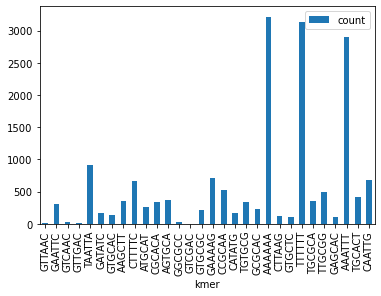

In [65]:
small_df.plot(x ='kmer', y='count', kind = 'bar')

In [66]:
df[df['e_value'] <= 0.05]

,kmer,count,expected,z_score,e_value,p_value
0,AGCGGT,446,553,-4.550790,0.000003,0.010945
1,TTAAGG,333,427,-4.549510,0.000003,0.011012
2,GGTTCC,110,169,-4.538671,0.000003,0.011594
3,GTCATC,337,431,-4.528354,0.000003,0.012174
4,GGCATC,291,379,-4.520725,0.000003,0.012621
...,...,...,...,...,...,...
3873,GGTAAA,1275,1124,4.505336,0.000003,0.013572
3874,TGCAAC,715,604,4.517271,0.000003,0.012829
3875,AATAAT,2252,2046,4.556772,0.000003,0.010638
3876,AGCACA,480,390,4.557813,0.000003,0.010586


In [67]:
dfn1, dfn2 = gets_selected_kmers(kmer_lst, 
                        kmer_counts, 
                        kmer_exp_higher, 
                        z_scr, 
                        pv, 
                        ev, 
                        eval_cutoff=0.01)

In [68]:
df_fil

,kmer,count,expected,z_score,e_value,p_value
0,GTTAAC,19,336,-17.295356,2.549369e-67,1.044222e-63
1,GAATTC,302,668,-14.163550,7.700611e-46,3.154170e-42
2,GTCAAC,24,244,-14.084996,2.348433e-45,9.619182e-42
3,GTTGAC,17,231,-14.081055,2.483140e-45,1.017094e-41
4,TAATTA,916,1410,-13.160875,7.368459e-40,3.018121e-36
...,...,...,...,...,...,...
213,GAAAAA,2667,2089,12.653383,5.357993e-37,2.194634e-33
214,CCGCAC,1171,735,16.085333,1.616551e-58,6.621393e-55
215,GTGCGG,1113,672,17.015069,3.174936e-65,1.300454e-61
216,CGCACT,1164,696,17.742869,9.784264e-71,4.007635e-67


In [69]:
set(dfn1.kmer).difference(set(df_fil.kmer))

set()

In [70]:
dfn1

,kmer,count,expected,z_score,e_value,p_value
0,GTTAAC,19,336,-17.295356,2.549369e-67,1.044222e-63
1,GAATTC,302,668,-14.163550,7.700611e-46,3.154170e-42
2,GTCAAC,24,244,-14.084996,2.348433e-45,9.619182e-42
3,GTTGAC,17,231,-14.081055,2.483140e-45,1.017094e-41
4,TAATTA,916,1410,-13.160875,7.368459e-40,3.018121e-36
...,...,...,...,...,...,...
213,GAAAAA,2667,2089,12.653383,5.357993e-37,2.194634e-33
214,CCGCAC,1171,735,16.085333,1.616551e-58,6.621393e-55
215,GTGCGG,1113,672,17.015069,3.174936e-65,1.300454e-61
216,CGCACT,1164,696,17.742869,9.784264e-71,4.007635e-67


In [71]:
df_fil.equals(dfn1)

False

In [72]:
operator.eq(dfn1, df_fil)

,kmer,count,expected,z_score,e_value,p_value
0,True,True,True,True,False,False
1,True,True,True,True,False,False
2,True,True,True,True,False,False
3,True,True,True,True,False,False
4,True,True,True,True,False,False
...,...,...,...,...,...,...
213,True,True,True,True,False,False
214,True,True,True,True,False,False
215,True,True,True,True,False,False
216,True,True,True,True,False,False


In [ ]:
df

In [ ]:
dfn2

    prob_mer_nao_aparecer = 1−(1−1/4r)n−r+1

A crude approximation would be 1−(1−1/4r)n−r+1. You take the probability that your sequence do not occur at a particular location, put it to the power of the number of locations (falsely assuming independence), which is n−r+1 not n−r, and this is an approximation of its not occurring so you then need to subtract this from 1.

In [364]:
new_pal_v = repeated_palindrome(pal_vibrio)

In [ ]:
def som(kmer, kmer_counts):
    di = list(get_kmers_from_sequence(kmer, 2, 2))[1:-1]
    tri = list(get_kmers_from_sequence(kmer, 3, 3))
    up = 1
    down = 1
    for t in tri:
        up *= kmer_counts[t]
    for d in di:
        down *= kmer_counts[d]
    ex = int(up/down)
    return ex

In [ ]:
som('GGCGCC', kmer_counts)

In [ ]:
som('GGCGCC', kmer_counts_ec)

In [ ]:
'ggcgcc'.upper()

In [ ]:
def tom(kmer, kmer_freqs):
    tet = list(get_kmers_from_sequence(kmer, 4, 4))
    tri = list(get_kmers_from_sequence(kmer, 3, 3))[1:-1]
    up = 1
    down = 1
    for t in tet:
        up *= kmer_counts[t]
    for d in tri:
        down *= kmer_counts[d]
    ex = int(up/down)
    return ex

In [ ]:
tom('GGCGCC', kmer_counts), kmer_counts['GGCGCC']

In [ ]:
tom('GGCGCC', kmer_counts_ec), kmer_counts_ec['GGCGCC']

In [ ]:
def fom(kmer, kmer_counts):
    pre = kmer_counts[kmer[:-1]]
    suf = kmer_counts[kmer[1:]]
    mid = kmer_counts[kmer[1:-1]]
    ex = int((pre*suf) / mid)
    return ex

In [ ]:
fom('GGCGCC', kmer_counts)

In [ ]:
fom('GGCGCC', kmer_counts_ec)

In [ ]:
km_lst = []
with open('Data/test/ecoli_6.txt', 'r') as fh:
    for line in fh:
        line = line.strip()
        if line !='':
            km_lst.append(line)

In [ ]:
ecoli = defaultdict(int)
with open('Data/test/ecol4_6.txt', 'r') as fh:
    for line in fh:
        line = line.strip().replace(':', ',').split(',')
        if line != ['']:
            ecoli[line[0]] = ecoli.get(line[0], 0) + int(line[1])

In [ ]:
fom('agcgcc', ecoli)

In [ ]:
get_expected_higher_markov(km_lst, ecoli)['agcgcc']

In [ ]:
norm.sf(abs(-17.3157))

In [ ]:
math.erfc(- -17.3157/ math.sqrt(2)) / 2

**Tests**

In [ ]:
def transition_matrix(base_freq, mer_freq):
    """
    Returns a transition matrix from a base_count dictionary and a
    k-mer frequency dictionary as inputs.
    
    Inputs:
        
        base_freq - a dictionary-like object mapping nucleotides to their counts.
        mer_freq - a dictionary-like object mapping kmers to their frequencies.
                   The kmers are substring with length k from a string/genome.
    
    Outputs:
        tm - a dictionary-like object mapping a substring (key) to a dictionary
             mapping th nucleotides to their probabilities. The matrix associated 
             with a change of basis for a vector space. Stochastic matrix, a 
             square matrix used to describe the transitions of a Markov chain. 
             State-transition matrix, a matrix whose product with the state vector 
             at an initial time gives at a later time .
    """
    # initialize the container
    tm = defaultdict(dict)
    # iterates to the key, value pairs
    for char1, cnt1 in mer_freq.items():
        # add the character to the container
        tm[char1] = tm.get(char1, {})
        # iterates to the key, value pairs
        for char2, cnt2 in base_freq.items():
            # add the keys and the calculated probabilities
            # to the matrix
            tm[char1][char2] = tm[char1].get(char2, cnt1 * cnt2)
    return tm

In [ ]:
def variance(len_seq, prob_kmer):
    return len_seq * prob_kmer * (1 - prob_kmer)

In [ ]:
variance(len_sequence, p['GTTAAC'])

In [ ]:
# high markove expected = counts[kmer[:-1]]*counts[kmer[1:]]/counts[kmer[1:-1]]

In [ ]:
def expected_kmer_higher_markov(kmer_list, observed_count):
    """
    Calculates the expected value of a kmer based in a higher order Markov
    model. The model expand the middle for the two extremities of the kmer.
    
    Inputs:
    
        kmer_list - a list of kmers (string of length k).
        observed_count - a dictionary-likeobject with the observed/counts of
                         kmer (length between kmin and kmax) counted in a 
                         bigger sequence/genome.
    
    Outputs:
    
        expected_counts - a dictionary-likeobject with the expected counts of
                         kmer (length between kmin and kmax) according to a 
                         higher order Markov Model.        
    """
    # initialize the countainer
    expected_counts = defaultdict(int)
    # iterates through the content of the list
    for kmer in kmer_list:
        # gets the substrings
        pre, mid, suf = kmer[1:], kmer[1:-1], kmer[:-1]
        # look for the substrings counts and
        # get the expected values and add it to the countainer
        # it was add a small pseudo count to avoid erros by 
        # zero division
        expected = int((observed_count[suf] * observed_count[pre]) / (observed_count[mid] + 0.000001))
        expected_counts[kmer] = expected_counts.get(kmer, 0) + expected
    return expected_counts

In [ ]:
def variance_higher_order_markov(kmer_list, len_sequence, expected_count, k):
    """
    Calculates the variance of the HOMM as Var(C(W)) = N* P(W) * (1-P(W)) = E(C(W)) * (1 - E(C(W))/N),
    because the model is the sum of N almost independent observations, 
    each with probability P(W), it can be well modeled as a binomial distribution.
    
    Inputs:
    
        kmer_list - a list of kmers (string of length k).
        observed_count - a dictionary-likeobject with the observed/counts of
                         kmer (length between kmin and kmax) counted in a 
                         bigger sequence/genome.
    
    Outputs:
    
        expected_counts - a dictionary-likeobject with the expected counts of
                         kmer (length between kmin and kmax) according to a 
                         higher order Markov Model.        
    """
    std = defaultdict(float)
    for kmer in kmer_list:
        exp = expected_count[kmer]
        if exp == 0:
            sigma = 0.0
            std[kmer] = std.get(kmer, 0.0)
        else:
            sigma = math.sqrt(exp * (1 - exp/(N-k+1)))
            std[kmer] = std.get(kmer, 0.0) + sigma
    return std

In [ ]:
def get_z_scores(kmer_list, observed_count, expected_count, std):
    z_scores = defaultdict(float)
    for kmer in kmer_list:
        obs = observed_count[kmer]
        exp = expected_count[kmer]
        sigma = std[kmer]
        z_scores[kmer] = z_scores.get(kmer, 0.0) + (obs - exp)/sigma
    return z_scores

In [ ]:
def get_under_over_represented_kmers(kmer_list, len_sequence, z_scores, cutoff_e=0.05):
    evalues = defaultdict(float)
    random = defaultdict(float)
    for kmer in kmer_list:
        z = z_scores[kmer]
        under = len_sequence * math.erfc(-z/ math.sqrt(2)) / 2
        over = len_sequence * math.erfc(z/ math.sqrt(2)) / 2
        if under <= cutoff_e:
            evalues[kmer] = evalues.get(kmer, 0.0) + under
        elif over >= cutoff_e:
            evalues[kmer] = evalues.get(kmer, 0.0) + over
        else:
            evalues[kmer] = evalues.get(kmer, 0.0) + over
            evalues[kmer] = evalues.get(kmer, 0.0) + under
    return evalues, random

In [ ]:
seq

In [ ]:
def get_pattern_starpos_rgx(sequence, pattern):
    """ Return a list of start positions of the matched pattern in the string"""
    return [match.start() for match in re.finditer(r'(?='+pattern+')', sequence)]

In [ ]:
%timeit get_pattern_starpos_rgx(seq, 'GTTAAC')

In [222]:
def pattern_locations(sequence, pattern):
    """Return the pattern start positions"""
    n = len(sequence)
    m = len(pattern)
    return [i for i in range(n - m + 1) if sequence[i:i+m] == pattern]

In [223]:
def get_pattern_positions_rgx(sequence, pattern):
    return [pos.span()[0] for pos in re.finditer(r'('+pattern+')', sequence)]

In [224]:
%timeit pattern_locations(seqv, 'GTTAAC')

171 ms ± 16.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [235]:
get_pattern_positions_rgx(seqv, 'ATTTATCAGCCCTGTGCCGTAAAACTCCGTCCTTCAGGGCGGAGATATAAGGCACAGGGCTGATAAAT')

[256967]

In [ ]:
def get_chunks(sequence, window_size, step=1):
    """Returns a chunk of length of window_size and the end of the window size
    
    Inputs:
        sequence - a string representing a sequence.
        window_size - integer representing the length of the
                      chunk/window.
        step - a interger representing the length of the overlap window.
    
    Outputs:
        chunk - a string of length 'window'.
        end - a integer representing the end of the chunk.
    """
    # get the sequence length
    k = len(sequence)
    # get the index for each end and chunk
    for i in range(0, k - window_size + 1, step):
        # generate the end of the window
        end = i + window_size
        # get the slice of the sequence
        chunk = sequence[i:i + window_size]
        # assure the the chunk is the expected size
        assert len(chunk) == window_size
        yield chunk, end

In [ ]:
def hamming_distance(sequence1, sequence2):
    """Return the HD form two inputed sequences"""
    return len([(x,y) for x,y in zip(sequence1, sequence2) if x != y])

In [ ]:
s1 = 'GGGCCGTTGGT'
s2 = 'GGACCGTTGAC'
hamming_distance(s1, s2)

In [ ]:
def pattern_with_mismatches_finder(sequence, pattern, distance):
    """Return list of positions of the pattern with hamming distance d from one input sequence."""
    positions = []
    count = 0
    for i in range(len(sequence) -  len(pattern) + 1):
        pat = sequence[i:i+len(pattern)]
        if hamming_distance(pattern, pat)<= distance:
            count += 1
            positions.append(i)
    return positions

In [ ]:
len(pattern_with_mismatches_finder(seq, 'GTTAAC', 3))

In [ ]:
def hamming_pattern_count(sequence, pattern, distance):
    """Return the number of times the pattern with hamming distance d is found 
    in the inputed sequence."""
    return len([i for i in range(len(sequence) - len(pattern) + 1) if 
                hamming_distance(sequence[i:i+len(pattern)], pattern) <= distance])

In [ ]:
%timeit hamming_pattern_count(seq, 'GTTAAC', 3)

In [ ]:
hamming_pattern_count(seq, 'GTTAAC', 3)

In [ ]:
def get_gc_strand_difference(sequence, start):
    """
    Calculates the difference between the G and C content in  the sequence.
    
    Inputs:
    
        sequence - 
    """
    seq = sequence.upper()
    seq_len = len(seq)
    half = seq_len // 2
    ter = start + half
    if ter > seq_len:
        ter = ter - seq_len + 1
    elif ter > start:
        g = 2 * seq[start:ter].count('G') - seq.count('G')
        c = 2 * seq[start:ter].count('C') - seq.count('C')
    else:
        g = seq.count('G') - 2 * seq[start:ter].count('G')
        c = seq.count('C') - 2 * seq[start:ter].count('C')
    return g - c  

In [ ]:
arr = np.arange(4)

In [ ]:
arr

In [ ]:
row_vec = arr[np.newaxis, :] 

In [ ]:
row_vec, row_vec.shape

In [ ]:
col_vec = arr[:, np.newaxis]

In [ ]:
col_vec, col_vec.shape

In [ ]:
def markov(seq):
    """Get a 1st-order Markov model from a sequence of nucleotides."""
    model = np.zeros((4, 4))
    tz.last(tz.pipe(seq,
                    cur.sliding_window(2),
                    # each successive tuple
                    cur.map(PDICT.__getitem__),
                    # location in matrix of tuple
                    cur.map(increment_model(model)))) # increment matrix
    # convert counts to transition probability matrix
    model /= np.sum(model, axis=1)[:, np.newaxis]
    return model

In [ ]:
model = np.zeros((4, 4))

In [ ]:
model

In [ ]:
np.sum(model, axis=1)[:, np.newaxis] # rows

In [ ]:
np.sum(model, axis=0)[:, np.newaxis]

In [ ]:
model/np.sum(model, axis=1)[:, np.newaxis]

In [ ]:
%%timeit -r 1 -n 1
dm = 'Data/dm6.fa'
# we use `take` to just run on the first 10 million bases, to speed things up.
# the take step can just be removed if you have ~5-10 mins to wait.
model = tz.pipe(dm, genome, c.take(10**7), markov)

In [ ]:
dm = 'Data/dm6.fa'
# we use `take` to just run on the first 10 million bases, to speed things up.
# the take step can just be removed if you have ~5-10 mins to wait.
model = tz.pipe(dm, genome, c.take(10**7), markov)

In [ ]:
model

In [ ]:
gzopen  =  tz.curry(gzip.open)

In [ ]:
model = tz.pipe('Data/Escherichia_coli_k_12.GCA_000800765.1.29.dna.genome.fa.gz', genome_gz, markov)

In [ ]:
def  plot_model(model,  labels,  figure=None): 
    fig  =  figure  or  plt.figure() 
    ax  =  fig.add_axes([0.1,  0.1,  0.8,  0.8]) 
    im  =  ax.imshow(model,  cmap='magma'); 
    axcolor  =  fig.add_axes([0.91,  0.1,  0.02,  0.8]) 
    plt.colorbar(im,  cax=axcolor) 
    for  axis  in  [ax.xaxis,  ax.yaxis]: 
        axis.set_ticks(range(4)) 
        axis.set_ticks_position('none') 
        axis.set_ticklabels(labels) 
    return  ax

In [ ]:
plot_model(m,  labels='ACGT');

In [ ]:
m

    A by A high 
      by C low  
      by G low 
      by T very low 
    C by A high 
      by C low 
      by G high 
      by T very low

In [ ]:
 model1 = tz.pipe('Data/H.influenzae.fa.gz', genome_gz, markov)

In [ ]:
plot_model(model1,  labels='ACGT');

In [ ]:
 model2 = tz.pipe('vibrio.fna.gz', genome_gz, markov)

In [ ]:
plot_model(model2,  labels='ACGT');

In [ ]:
def count_occurence(seq):

    counted_states = []
    transition_dict = {}
    for tup in seq:
        if tup not in counted_states:
            transition_dict[tup] = seq.count(tup)
        counted_states.append(tup)
    print(transition_dict)
    #{('A', 'A'): 3, ('A', 'B'): 2, ('B', 'B'): 1, ('B', 'A'): 2}

def markov(seq):

    states = Counter(seq).keys()
    print(states)
    #dict_keys(['A', 'B'])
    a = list(zip(seq[:-1], seq[1:]))
    print(a)
    #[('A', 'A'), ('A', 'B'), ('B', 'B'), ('B', 'A'), ('A', 'B'), ('B', 
    #'A'), ('A', 'A'), ('A', 'A')]
    return a

seq = markov(["A","A","B","B","A","B","A","A","A"])
count_occurence(seq)

In [ ]:
count_occurence(seq)

In [ ]:
modelv = tz.pipe('vibrio.fna.gz', genome_gz, markov2)

In [ ]:
modelv

In [ ]:
list(pairs(seq))